# SMCA sphere initialization on Delaunay tetrahedral meshes 

## Volume error comparison for a sphere-octant in a tetrahedral mesh (Table 3) in

## Jones, B. W. S., Malan, A. G., & Ilangakoon, N. A. (2019). The initialisation of volume fractions for unstructured grids using implicit surface definitions. Computers and Fluids, 179, 194–205. https://doi.org/10.1016/j.compfluid.2018.10.021


In [1]:
import os
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import cycle

from plot_study import *

rcParams["text.usetex"] = True
rcParams["figure.dpi"] = 300 
rcParams["font.size"] = 9
rcParams["axes.titlesize"] = 9
rcParams["axes.labelsize"] = 9
global_markers = ['o', 'x', '^', 'v', 'd']

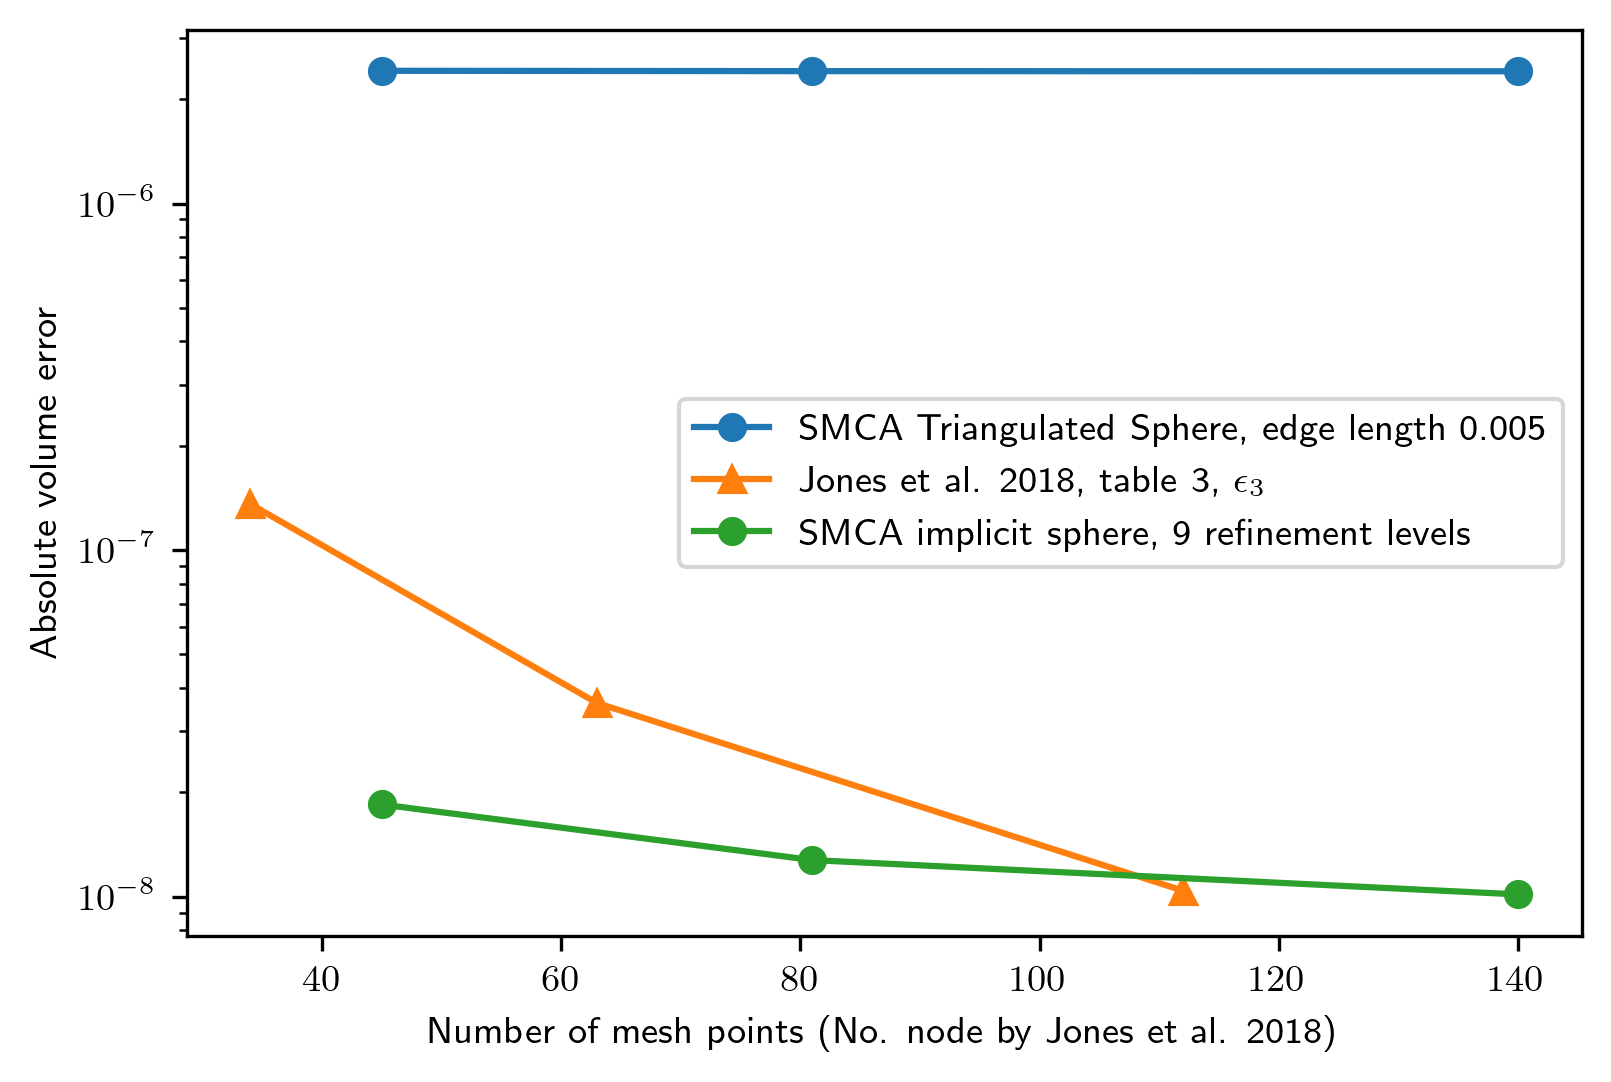

In [6]:
# Exact volume 
sphere_radius = 0.5
sphere_octant_volume = sphere_radius**3 * 4 * pi / 24.

# Absolute volume errors from Table 3  https://doi.org/10.1016/j.compfluid.2018.10.021
no_node = [34, 63, 112]
epsilon_3 = [1.36e-07,3.62e-08,1.04e-08]

# NoNodeSMCA (from j.compfluid.2018.10.021-table3-levelSet.parameter )
no_node_smca = [45, 81, 140]
# SMCA data
smca_lset_dframe = pd.read_json("j.compfluid.2018.10.021-table3-levelSet.json", orient='table')
smca_lset_error = np.array((smca_lset_dframe["VOLUME_FROM_VOLUME_FRACTION"] - sphere_octant_volume).abs())
smca_trisurf_dframe = pd.read_json("j.compfluid.2018.10.021-table3-triSurface.json", orient='table')
smca_trisurf_error = np.array((smca_trisurf_dframe["VOLUME_FROM_VOLUME_FRACTION"] - sphere_octant_volume).abs())
plt.plot(no_node_smca, smca_trisurf_error, '-o', label='SMCA Triangulated Sphere, edge length 0.005')
plt.plot(no_node, epsilon_3, '-^', label='Jones et al. 2018, table 3, $\epsilon_3$')
plt.plot(no_node_smca, smca_lset_error, '-o', label='SMCA implicit sphere, 9 refinement levels')
plt.ylabel("Absolute volume error")
plt.xlabel("Number of mesh points (No. node by Jones et al. 2018)")
plt.semilogy()
plt.legend()
plt.savefig("j.compfluid.2018.10.021.pdf")